In [32]:
import rhessys.utilities as rut

In [33]:
dat = pd.read_pickle('./data/Vcm_cosmos_pillow_swe.pcl')

In [34]:
dat['wateryear'] = dat.index.map(rut.wateryear)

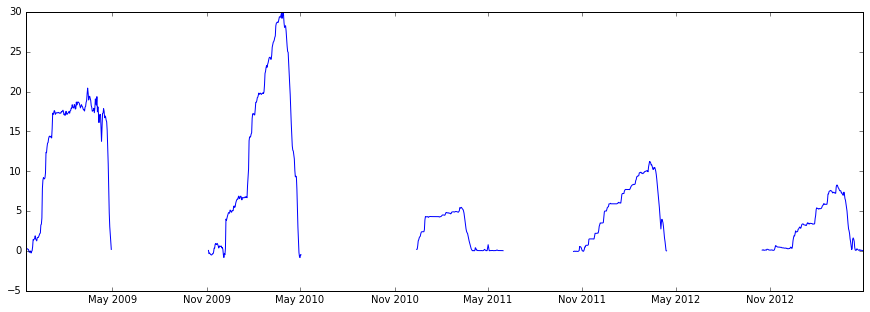

In [35]:
plt.figure(figsize=(15,5))
plt.plot(dat.swe)

In [36]:
dat.head()

,swe,wateryear
2008-11-14,-0.030480,2009
2008-11-15,0.152400,2009
2008-11-16,0.274108,2009
2008-11-17,0.267758,2009
2008-11-18,0.208068,2009


In [37]:
len(dat)

1661

In [38]:
swe = dat.swe.as_matrix()

P = swe[1:] - swe[0:-1]
P2 = list(P)
P2.append(0)

In [39]:
dat['P'] = P2

In [40]:
dat.loc[dat.P<0,'P'] = 0.

In [41]:
dat.P /= 100. # cm to m

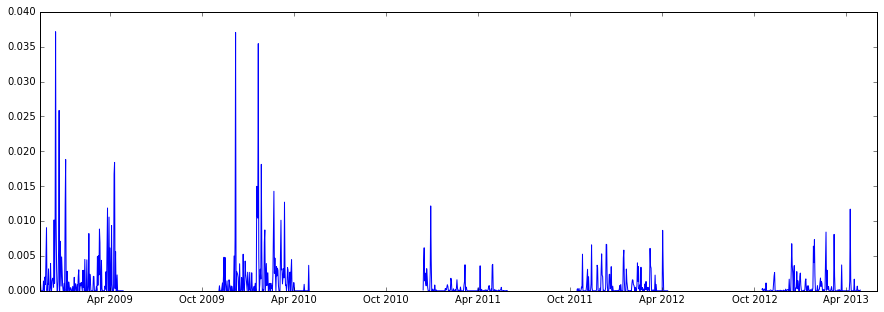

In [42]:
plt.figure(figsize=(15,5))
plt.plot(dat.P)

In [43]:
dat['cumulative_P'] = dat.groupby('wateryear').P.cumsum()

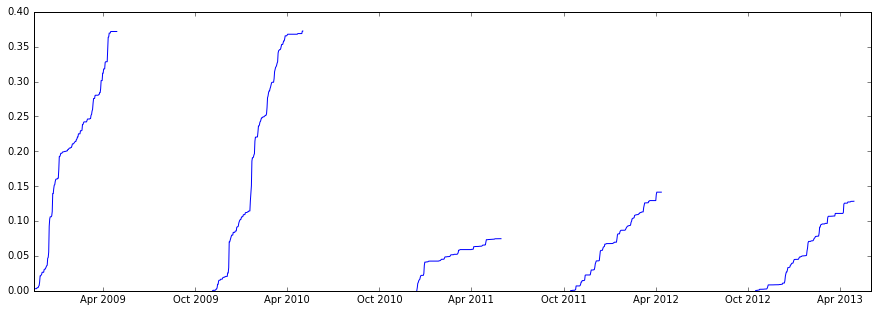

In [44]:
plt.figure(figsize=(15,5))
plt.plot(dat.cumulative_P)

In [45]:
met = pd.read_pickle('./data/vcm_hourly_from_raws.pcl')

In [46]:
dat2 = pd.merge(left=dat,right=met,left_index=True, right_index=True,how='outer')

In [47]:
dat2.head(10)

,swe,wateryear,P,cumulative_P,AT,RH,TD,Tw
2002-10-01 00:00:00,NaN,NaN,NaN,NaN,3.935860,40.434212,-8.318377,-1.427536
2002-10-01 01:00:00,NaN,NaN,NaN,NaN,3.076757,34.925555,-10.950887,-2.232431
2002-10-01 02:00:00,NaN,NaN,NaN,NaN,2.633208,31.886821,-12.480518,-2.634567
2002-10-01 03:00:00,NaN,NaN,NaN,NaN,2.635441,31.540557,-12.613969,-2.639140
2002-10-01 04:00:00,NaN,NaN,NaN,NaN,3.083303,33.911800,-11.314896,-2.247530
2002-10-01 05:00:00,NaN,NaN,NaN,NaN,3.946274,38.825638,-8.829981,-1.455832
2002-10-01 06:00:00,NaN,NaN,NaN,NaN,5.165543,45.924977,-5.543043,-0.273403
2002-10-01 07:00:00,NaN,NaN,NaN,NaN,6.658019,54.703190,-1.824209,1.256308
2002-10-01 08:00:00,NaN,NaN,NaN,NaN,8.321993,64.545313,2.026141,3.047701
2002-10-01 09:00:00,NaN,NaN,NaN,NaN,10.044066,74.773500,5.770586,4.978882


In [48]:
new_met = pd.DataFrame({'P':dat2.resample('D',how='sum').P,
                        'Tmax':dat2.resample('D',how='max').AT,
                        'Tave':dat2.resample('D',how='mean').AT,
                        'Tmin':dat2.resample('D',how='min').AT})

In [49]:
# crop to WY2009-WY2012

strt = '2009-10-01'
nd = '2012-10-5'

new_met = new_met[strt:nd].copy()

In [50]:
new_met.loc[np.isnan(new_met.P),'P'] = 0.

In [51]:
print new_met.index.min()
print new_met.index.max()

dt = new_met.index.min()

header = '%s %s %s'%(dt.year,dt.month,dt.day)

2009-10-01 00:00:00
2012-10-05 00:00:00


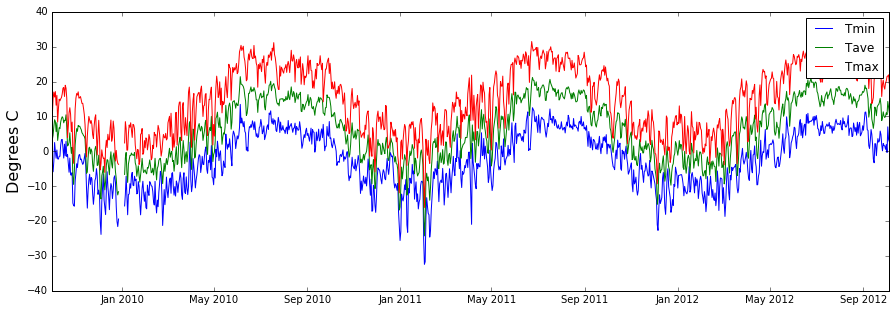

In [52]:
plt.figure(figsize=(15,5))
plt.plot(new_met.Tmin,'-',label='Tmin')
plt.plot(new_met.Tave,'-',label='Tave')
plt.plot(new_met.Tmax,'-',label='Tmax')
plt.legend()
plt.ylabel('Degrees C', fontsize=16)

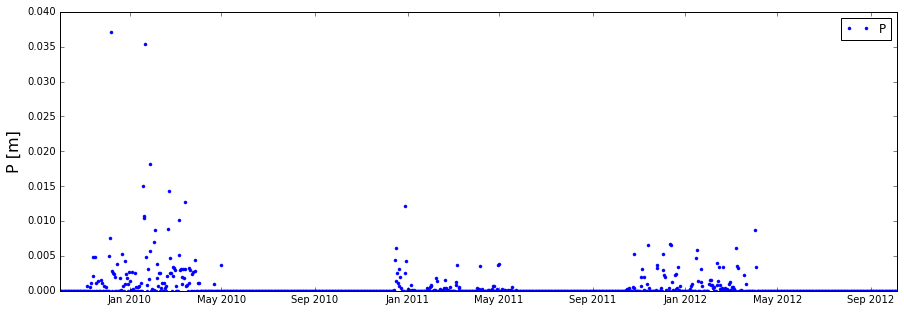

In [53]:
plt.figure(figsize=(15,5))
plt.plot(new_met.P,'.')
plt.legend()
plt.ylabel('P [m]', fontsize=16)

In [55]:
new_met.to_pickle('./data/cosmos_p_from_swe.pcl')